In [3]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
#from keras import backend as K
from keras.datasets import mnist

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

In [4]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=2048,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 90s 2ms/step - loss: 0.5302 - val_loss: 0.2897
Epoch 2/50
60000/60000 [==============================] - 94s 2ms/step - loss: 0.2508 - val_loss: 0.2310
Epoch 3/50
60000/60000 [==============================] - 89s 1ms/step - loss: 0.2216 - val_loss: 0.2152
Epoch 4/50
60000/60000 [==============================] - 90s 2ms/step - loss: 0.2078 - val_loss: 0.2007
Epoch 5/50
60000/60000 [==============================] - 91s 2ms/step - loss: 0.1997 - val_loss: 0.1947
Epoch 6/50
60000/60000 [==============================] - 88s 1ms/step - loss: 0.1931 - val_loss: 0.1906
Epoch 7/50
60000/60000 [==============================] - 89s 1ms/step - loss: 0.1878 - val_loss: 0.1848
Epoch 8/50
60000/60000 [==============================] - 87s 1ms/step - loss: 0.1832 - val_loss: 0.1830
Epoch 9/50
60000/60000 [==============================] - 87s 1ms/step - loss: 0.1799 - val_loss: 0.1762
Epoch

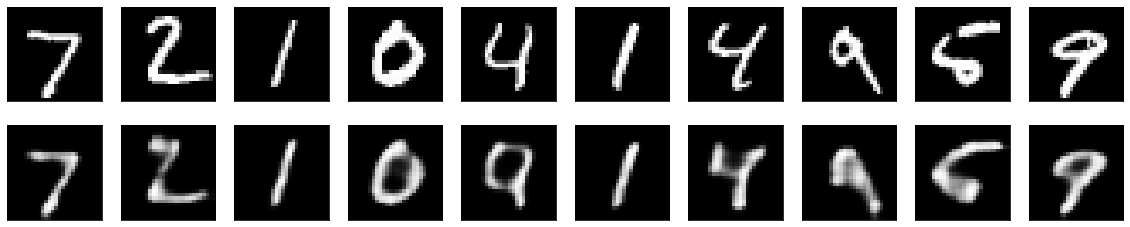

In [5]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

NameError: name 'encoded_imgs' is not defined

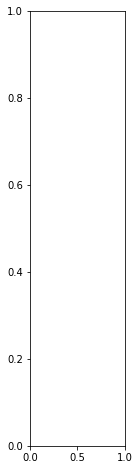

In [6]:
n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(encoded_imgs[i].reshape(4, 4 * 8).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()